# **Seminar 2 - units 7 (community detection) and 8 (graph diffusion)**

---

**Course**: Graphs and Network Analysis

**Degree**: Artificial Intelligence

**Content**: Practical sminar with exercises of the units 7 and 8.

**Description of the activity**: In this seminar we will put into practice the knowledge of the topics of communities and graph diffusion. We will work with two different sets of data. First, we will practice the theme of communities with data extracted from Spotify. Regarding the topic of graph diffusion, we will work with real data on the impact of COVID-19 in Spanish provinces over a period of time.


## Assessment

---

**Final submission**: You will have to deliver a Colab '.ipynb' file corresponding to each group (you can do the exercise individually or in groups of 2 people). To get the file go to File --> Download. You have to answer and analyze the different problems. The programming code will NOT be evaluated but how the problem was solved and reasoned. So the "report" will consist in the results generated by the execution of the various cells where you write the code and the comments you write there. We recommend that for each part of the exercise that requires an explanation, insert a text cell with this short dscription. No need for long explanations, if the exercise is to call a NetworkX function, the code is self-explanatory, but in the exercises where you have to program a little of code, you may need to reason about the obtained results.

When submitting the '.ipynb' file, **keep the output of the execution with the results visible**.

**Submission form**: The delivery will be made through the Virtual Campus. You will need to upload it through the submission resource set up there. If there is more than one person in the group, it is enough for one of you to make the submission. Don't forget to put the name of the group members in the given colab code.

**Doubts**: For any doubts you can contact Josep.Llados@uab.cat.

**Submission dadline**: Monday **May 13** (included).

## Credit

---

This activity was originally designed by Adrià Molina.

## Materials

---

You will find code examples in the Google Colab notebooks for units 7 and 8 (you will find the links in the Virtual Campus).


**<font color='red'>!!! DON'T FORGET TO FILL IN THE FOLLOWING INFORMATION IN YOUR SUBMISSION FILE !!!</font>**`
---

Please fill in the data below:

**Group members**:

*   NAME 1 - NIA 1 - email1
*   NAME 2 - NIA 2 - email2


## Working framework preparation
----

The main libraries that will be used in this seminar are the following:

* [NetworkX](https://networkx.github.io/)
* [Pandas](https://pandas.pydata.org/)
* [Geopandas](https://geopandas.org/)
* [Matplotlib](https://matplotlib.org/)
* [NumPy](https://numpy.org/)

First we create a directory where we will download a series of files with the data.

In [ ]:
####################################################################################
#### WARNING (NOV 2022 --> There is a bug in new version of NetworkX when calling scipy functions (within numpy), better to install NetworkX version 2.7)
#### This compatibility issue will probably be fixed in the future. It affects to the graph visualization functions.
#### RUN this cell in case you have errors when visualizing the graph
####################################################################################
#!pip install 'scipy>=1.8'
!pip install 'networkx<2.7'

In [ ]:
!mkdir data_generated
!pip install geopandas
!pip install libpysal

#   Provincias españolas - Data in CSV format
#   translate_clean.csv --> Codes of provinces
#   provincias-espanolas.geojson --> polygon information to draw the map
#   graph.ml
#   casos_diagnostico_provincia.csv --> information of infections per province

!wget -O translate_clean.csv https://github.com/EauDeData/data_for_seminars/blob/main/translate_clean.csv?raw=True
!wget -O provincias-espanolas.geojson https://github.com/EauDeData/data_for_seminars/blob/main/provincias-espanolas.geojson?raw=True
!wget -O graph.ml https://github.com/EauDeData/data_for_seminars/blob/main/graph.ml?raw=True
!wget -O casos_diagnostico_provincia.csv https://github.com/EauDeData/data_for_seminars/blob/main/casos_diagnostico_provincia.csv?raw=True

# Spotify - Communities - files in gexf format (Graph Exchange XML Format)
!wget -O LoveOfLesbian_1389.gexf https://github.com/EauDeData/data_for_seminars/blob/main/LoveOfLesbian_1389.gexf?raw=True
!wget -O Blackpink_2997.gexf https://github.com/EauDeData/data_for_seminars/blob/main/Blackpink_2997.gexf?raw=True
!wget -O BadBunny_1814.gexf https://github.com/EauDeData/data_for_seminars/blob/main/BadBunny_1814.gexf?raw=True


Packages import.

In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from libpysal import weights
import copy
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from matplotlib.animation import FuncAnimation
from scipy.interpolate import make_interp_spline, BSpline

ModuleNotFoundError: No module named 'geopandas'

# UNIT 7 - COMMUNITY DETECTION

---



In this use case we can choose one of the three following graphs:

* LoveOfLesbian_1389
* Blackpink_2997
* BadBunny_1814

The three graphs are constructed from different Spotify artists; which represent the nodes. Depending on whether two artists have worked together or not, an edge is placed with weight equal to the number of times they have collaborated.
The name of the graph (the three above) indicates the node from which artists have started to be explored and the number of nodes. You can use the one you prefer. For example *LoveOfLesbian_1389* means that the node from which Spotify has been explored is *Love of Lesbian* and this graph has 1389 nodes.

Using different seed nodes in exploration gives access to different communities within the music industry. Some information of interest to choose the graph can be:


    LoveOfLesbian_1389: Spanish pop/rock/indie industry
    Blackpink_2997 International mainstream pop industry
    BadBunny_1814 Urban music industry (International and Hispanic)

The three graphs are not disjoint. The intersection, or the union, could be generated. Below is the code to do the intersection of the node sets of the three graphs.

If you want to generate a graph from a different artist, you can find the script in the [github repository](https://github.com/EauDeData/data_for_seminars) but you will need some runtime and [Spotify developer ](https://developer.spotify. com/dashboard/login)


In [ ]:
getset = lambda x: set(x.nodes())

graf1 = getset(nx.read_gexf('LoveOfLesbian_1389.gexf'))

graf2 = getset(nx.read_gexf('Blackpink_2997.gexf'))

graf3 = getset(nx.read_gexf('BadBunny_1814.gexf'))

#Intersection of the node sets of the three graphs
print("Number of common nodes of the intersection: ",len(graf3.intersection(graf2, graf1)))


Reading the data (xtension ```gexf```). You can use any of the three graphs. We use the variable **graf** to assign the selected graph.

In [ ]:
# If we want a different graph, change the variablee "nom"
# nom = 'Blackpink_2997.gexf'
# nom = 'BadBunny_1814.gexf'
nom = 'LoveOfLesbian_1389.gexf'
graf = nx.read_gexf(nom)

# Graph info
print(graf)

# If you want to show the information of the graph, uncomment the following line
#list(graf.edges.data())

# of if you want to see a particular edge ...
#list(graf.edges.data())[4]

The *weight* we have in the data table is the inverse of the number of collaborations between two artists, so the number will be closer to 0 (less distance) as the collaborations increase. If we want to recover this aggregate, and assign it to the edges:

In [ ]:
edge_data = {(edge[0], edge[1]): 1/edge[2]['weight'] for edge in graf.edges.data()}
nx.set_edge_attributes(graf, edge_data, 'n_colaboracions')

Graph visualization.

In [ ]:
# graph visualization
plt.rcParams['figure.figsize'] = [100,100]
plt.rcParams['figure.dpi'] = 100
pos=nx.spring_layout(graf)
nx.draw_networkx(graf, pos=pos, with_labels=True, node_size=700)

Some artists have been detected, but not explored; which means we have a record of their existence but not a record of their collaborations.
Such data could not be considered in the graph.
The following function allows us to clean up these nodes.

In [ ]:
def clean_graph(graf):
  # Some artists have not been explored;
  # It is not representative that they don't have any connection;
  # If you want, you can clean up these nodes
  graph = copy.deepcopy(graf)
  delete = []
  dg = nx.degree(graph)
  for node in graph.nodes():
      if dg[node] == 1: delete.append(node)
  for i in delete:
    graph.remove_node(i)
  return graph

# EXERCISES TO SOLVE
* You have to answer the sections that start with a **bullet point**.

----

### Basic measures
* What is the [diameter](https://en.wikipedia.org/wiki/Six_degrees_of_separation) of the graph?


In [ ]:
# ANSWER


What is the most important node of the whole graph?

In [ ]:
# ANSWER


## Clique detection
* What is the biggest clique of the graph?

In [ ]:
# ANSWER

maximum_clique = ...

In [ ]:
print(maximum_clique)



* What is the most central artist of the maximum clique?

In [ ]:
# ANSWER

centrality = ...
max_centrality = ...
print(max_centrality)

* Which is the clique with the highest number of collaborations (on average)?

In [ ]:
# ANSWER

maximum = ...
print(maximum)

### Divisive Clustering: Girvan Newman clustering

At this point the algorithm to use is quite expensive, so we will use the reduced graph, eliminating the less representative nodes with the `clean_graph()` function defined earlier.

In NetworkX the algorithm *Girvan Newman* is implemented in the `community` package.

In [ ]:
graf = clean_graph(graf)

* Visualitzeu a través de l'algorisme de Girvan Newman l'evolució d'un artista central de l'apartat anterior durant les diferents particions.

> We want a `graphs` list that contains each of the subgraphs generated by the different levels of the `girvan_newman()` algorithm that contain the target node. Note that the clustering algorithm obtains, at each level, a partition of the graph into *n* subgraphs. One of these will contain the target node.

In [ ]:
# ANSWER

target = ... # Name of the artist for which we want to see his/her evolution
graphs = [] # List of objects of type graph; representing the evolution of our node 'target'


If our `graphs` list contains a sequence of Graph objects, corresponding to splits at different levels of the hierarchy, we can visualize this sequence to see how the community evolves around our target node. We give you a code to generates this visualization, from the list of graphs (You have generated previously the `graphs` variable):

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

graphs = list(reversed(list(graphs)))
toKeep = []
for n,i in zip(range(len(graphs) - 1),graphs):
  if len(graphs[n]) != len(graphs[n+1]): toKeep.append(graphs[n])
  # Not all levels of the hierarchical algorithm vary the subgraph
  # of our target node; we remove this part for display convenience

def draw(i):
  nx.draw_networkx(toKeep[i])
  plt.show()
interact(draw, i=widgets.IntSlider(value = 0, max = len(toKeep)-1))


## K-Cores Clustering

* Find and visualize the k-Core graph that maximizes K.

In [ ]:
# ANSWER

k=...

In [ ]:
print("The largest k-Core corresponds to the k value of: ",k)
nx.draw_networkx(nx.k_core(graf, k))

* **Metrics**: Next to each  ```print``` write the call to the function to calculate the corresponding metric regarding the most central nodel, diameter, clustering coefficient, average connectivity...

In [ ]:
# ANSWER

def summary(graf):
  # We can prepare a summary() function with all the information we want to show from the graphs
  # ...
  print(f"Most central node: {...}")
  print(f"Diameter: {...}")
  print(f"Avg. Cluster Coeficient: {...}")
  print(f"Avg. Degree Connectivity: {...}")
  print(f"Avg. Shortest Path: {...}")


In [ ]:
graf_k_core = nx.k_core(graf, k)
summary(graf_k_core)

* Is the parameter `k` related to the average clustering coefficient of the core? Why?

In [ ]:
# ANSWER



# **UNIT 8 - DIFFUSION / LABEL PROPAGATION**

In these exercises we will analyze the spread of Covid for around 400 days since January 1, 2020. The data we obtained at the beginning are taken from public data on the impact by province.

Some provinces do not have a single name, so there are certain difficulties when aggregating the data.
We create a dictionary of synomyms.

In [1]:
sinonims = {"Castelló": "Castellón / Castelló", "Bizkaia": "Vizcaya / Bizkaia", "Illes Balears": "Baleares / Balears", 'Alacant': "Alicante",
           'València': "Valencia / València", "Gipuzcoa": "Guipúzcoa / Gipuzkoa", "Araba": "Álava", "Girona": "Gerona / Girona", "Ourense": "Orense / Ourense",
           "A Coruña": "La Coruña / A Coruña", "Navarra": "Navarra / Nafarroa", "Lleida": "Lérida / Lleida", }

This function allows us to visualize the map of Spain with the respective nodes and edges according to its provincial borders.
We can add the variable ```nCases = 1``` if our graph has the parameter _numero_casos_

In [ ]:
def visualize_map(graph, nCases = 0):
    filepath = "provincias-espanolas.geojson"
    spanish_regions = geopandas.read_file(filepath)
    centroids = np.column_stack((spanish_regions.centroid.x, spanish_regions.centroid.y))
    queen = weights.Queen.from_dataframe(spanish_regions)

    positions = dict(zip(graph.nodes, centroids))

    if not nCases:
        ax = spanish_regions.plot(linewidth=1, edgecolor="grey", facecolor="lightblue")
        ax.axis("image")
        ax.axis("off")
        nx.draw(graph, positions, labels = {x[0]: graph.nodes.data()[x[0]]['nom'] for x in graph.nodes.data()}, ax=ax, node_size=5, node_color="r", with_labels=0)
        plt.show()

        return None
    ax = spanish_regions.plot(linewidth=1, edgecolor="grey", facecolor="lightblue")
    ax.axis("image")
    ax.axis("off")
    nSize = {x[0]: graph.nodes.data()[x[0]]['num_casos'] for x in graph.nodes.data()}
    minimum, maximum = min(nSize.values()),max(nSize.values())
    nx.draw(graph, positions, labels = {x[0]: graph.nodes.data()[x[0]]['nom'] for x in graph.nodes.data()}, node_size = [int(100*(nSize[x] - minimum)/((maximum - minimum) if minimum != maximum else 1)) for x in nSize] , ax=ax, node_color="r", with_labels=0)
    plt.show()

    return None

In [ ]:
graph = nx.read_graphml('graph.ml')
casos_diarios = pd.read_csv('./casos_diagnostico_provincia.csv')
table = pd.read_csv('./translate_clean.csv')

For convenience and compatibility with the aggregate of the data, from different sources, we will ignore the autonomous cities:

In [ ]:
for provincia in [graph.nodes.data()[x[0]]['nom'] for x in graph.nodes.data()]:
    if not provincia in table['nom'].to_list():
        if not provincia in sinonims:
            print(provincia)
        elif not sinonims[provincia] in table['nom'].to_list():
            print(provincia)

In [ ]:
samples = casos_diarios.fecha.unique()
graphs = []

In [ ]:
nodes = [graph.nodes.data()[x[0]]['nom'] for x in graph.nodes.data()]
dict_code = {}
for n, node in enumerate(nodes):
    node2=node
    if node in ['Ceuta', 'Melilla']: continue
    if node in sinonims:
        node2 = sinonims[node]
    dict_code[node] = table[table['nom'] == node2]['codi'].to_list()[0]

name2number = {graph.nodes.data()[x[0]]['nom']: x[0] for x in graph.nodes.data()}
print("Codes of the provinces:\n\t",dict_code)
for day in samples:
    graph_copia = copy.deepcopy(graph)
    casos_sampled = casos_diarios[casos_diarios['fecha'] == day]
    data_to_insert = {}
    for provincia in dict_code:
        try:
            casos = casos_sampled[casos_sampled['provincia_iso'] == dict_code[provincia]]['num_casos'].to_list()[0]
        except:
            casos = 0

        data_to_insert[name2number[provincia]] = casos
    data_to_insert[name2number['Ceuta']] = 0
    data_to_insert[name2number['Melilla']] = 0
    nx.set_node_attributes(graph_copia, data_to_insert, name = 'num_casos')

    graphs.append(graph_copia)



In [ ]:
#%matplotlib qt
visualize_map(graphs[151], nCases=True)


# EXERCISES TO SOLVE
* You have to answer the sections that start with a **bullet point**.

----

## Diffusion and propagation
In the `graphs` variable we have a list of the state of covid in terms of the number of people affected by province.

In general, the contagion at a given node (transmission) in a SIR (Susceptible, Infected, Recovered) model depends on the number of neighbors (contacts) that are infected (interaction rate), and the probability of contagion. See the following figure taken from the class notes with the equation for the increase in contagions for an aggregate calculation case.


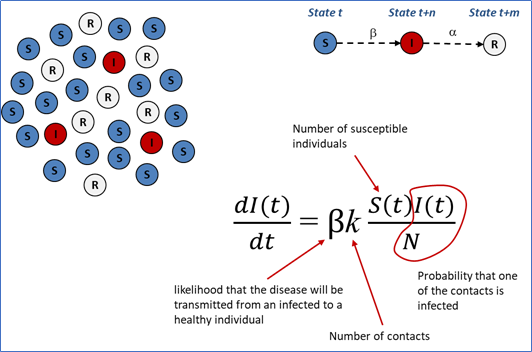

In our case, the nodes have the value of the infected people at the corresponding province at the instant *t* and the edges indicate the neighborhood (we will assume that the contagion occurs between neighboring provinces and with the intensity of the corresponding infected values) . For this we must define a transmission function, which will always depend on an aggregate of the values of the neighboring nodes.

Let's define a simple approximation to the transmission function between nodes iassuming that the next state of the node is the sum of the incoming nodes multiplied by a coefficient, according to the following equation:

# $n = \theta*(n + \sum n^{in}_{i} )$


In order to make less noisy predictions, one option is to calculate this coefficient as the average of the coefficients in a certain time window.
For example if we want to predict day 5, we will calculate the coefficient of day 1-2, 2-3... and assign the average of these values.

* Complete the function ```aproximació_coeficient_de_transmissió``` so it returns a dictionary ```{province: coefficient}```

In [ ]:
# ANSWER

def aproximació_coeficient_de_transmissió(grafs, mida_finestra, element_a_predir, lut = name2number):
    '''
    grafs: graphs list
    mida_finestra: number of previous graphs to compute the average
    element_a_predir: graph index to predict
    lut: look up table to get data from name to number

    returns:
        coeficients: Dictionary with the transmission coefficient of each province
    '''
    assert mida_finestra < element_a_predir, f"We can not compute a window {mida_finestra} days older than the selected item"
    coeficients = {}

    ...

    return coeficients

In [ ]:
coeficients = aproximació_coeficient_de_transmissió(graphs, 5, 300) # Using the function

From this we can get some interesting visualizations, such as the average coefficient throughout the year:
* Visualize the evolution plot of the coefficient average throughout the year.

In [ ]:
# ANSWER

avg_coeficient = []
...

In [ ]:
plt.plot(avg_coeficient)
plt.show()

Since the data was grouped weekly, the result is quite noisy. When we have a signal with a lot of variance at the local level we can use a smoothing by [convolution](https://en.wikipedia.org/wiki/Smoothing):

In [ ]:
# Smoothing by convolution
ksize = 3
avg_smoothed = [sum(avg_coeficient[max(i-ksize, 0):min(i+ksize, len(avg_coeficient))])/(ksize*2) for i in range(len(avg_coeficient))]

In [ ]:
plt.plot(avg_smoothed)
plt.show()

* What conclusions can you draw from this visualization? What do the inflexion points mean?

Write the **answer**:

> ANSWER ...

With this model we can make very simple predictions to know the infection rate of the day after a graph at the time *t*.
* Complete the function `predict()` so it fills a dictionary of results with the different predictions.
> GT (Ground Truth): The subsequent graph of the original data to the current graph can be used to calculate the error.

In [ ]:
def predict(graf, coeficients, GT = None, lut = name2number):
    '''
    graf: graph on which we want to predict the next iteration
    coeficients: transmission coefficients dictionary corresponding to the nodes (provinces)
    GT: Groundtruth, It would correspond to the actual values of the prediction, so we can calculate the error.
        For xample, we can make the prediction of day 150 from the previous 149, and compare with the actual 150.
    lut: look up table to retrieve data from name to number (name2number ehas been created previously)
    '''
   results = {}

    ...

    if GT:
        gt = {x: graf.nodes[name2number[x]]['num_casos'] for x in prediccions}
        error = {x: graf.nodes[name2number[x]]['num_casos'] - prediccions[x] for x in prediccions}
        avg_error = sum(error.values())/len(error)

        results['avg_error'] = avg_error
        results['sum_errors'] = sum(error.values())

    results['predicted'] = prediccions

    return results

Example of calls to the functions **`coeficients`** and **`predict`**

In [ ]:
coeficients = aproximació_coeficient_de_transmissió(graphs, 5, 300)

In [ ]:
prediccions = predict(graphs[299], coeficients, graphs[300])

In [ ]:
prediccions['predicted']['Tarragona'], graphs[300].nodes[name2number['Tarragona']]['num_casos']

* If we were at day 150; what number of total cases do you estimate for day 151?


In [ ]:
# ANSWER


* How can we improve the model?

Write the **answer**:

> ANSWER ...


Finally, even though the model is simple, it is important to be able to make decisions and evaluate them. In this case, the decision will aim to minimize the spread of the virus:

* Which set of 5 provinces would you confine the day 300 to minimize contagion to the rest?
* How much has the impact of the virus decreased the day 310 after confining these provinces?
>(hint: calculate predictions in the future time and compare them to the actual data of the day)


In [ ]:
# ANSWER
